In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
data = pd.read_csv('elections.csv',sep=';')
data.head()

,age,genderid,econ.conlib,rel.conlib,vote2016,conscientious
0,43,1,4,5,2,20
1,36,1,2,2,2,23
2,36,0,2,2,2,16
3,39,1,2,2,3,23
4,47,1,2,2,2,27


In [21]:
# define dependent and independent variable
X = data.drop('vote2016',axis=1)
X = sm.add_constant(X)
y = data['vote2016']
# be sure that y is categorical
y = y.astype('category')


In [22]:
# Null Model: only with intercept
null_model = sm.MNLogit(y, X['const']).fit(disp=0)

# Full Model: all the indepentend variables
full_model = sm.MNLogit(y, X).fit(disp=0)

In [23]:
# McFadden R-squared

LL_full = full_model.llf
LL_null = null_model.llf

mc_fadden_r2 = 1 - (LL_full / LL_null)

print(f"McFadden R-squared: {mc_fadden_r2:.4f}")

McFadden R-squared: 0.2334


In [24]:
# Calculate the Likelihood Ratio Test
G = -2 * (LL_null - LL_full)

df_null = (len(y.cat.categories) - 1) * 1
df_full = (len(y.cat.categories) - 1) * len(X.columns)
df_lrt = df_full - df_null

p_value = chi2.sf(G, df_lrt)

print(f"McFadden R-squared: {mc_fadden_r2:.4f}")
print(f"Likelihood Ratio Test Statistic (G): {G:.4f}")
print(f"Degrees of Freedom: {df_lrt}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("The LRT has statistical significance. Reject the H0, so there is at least one independent variable that has statistical significance.")
else:
    print("The LRT is not statistical significant. We can't reject H0.")

McFadden R-squared: 0.2334
Likelihood Ratio Test Statistic (G): 76.2700
Degrees of Freedom: 15
p-value: 0.0000
The LRT has statistical significance. Reject the H0, so there is at least one independent variable that has statistical significance.


In [25]:
#run the full model
full_model = sm.MNLogit(y, X).fit(disp=0)

In [26]:
print(full_model.summary())

                          MNLogit Regression Results                          
Dep. Variable:               vote2016   No. Observations:                  120
Model:                        MNLogit   Df Residuals:                      102
Method:                           MLE   Df Model:                           15
Date:                Tue, 05 Aug 2025   Pseudo R-squ.:                  0.2334
Time:                        09:43:12   Log-Likelihood:                -125.24
converged:                       True   LL-Null:                       -163.38
Covariance Type:            nonrobust   LLR p-value:                 3.336e-10
   vote2016=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.5131      2.699      3.154      0.002       3.222      13.804
age              -0.0363      0.042     -0.858      0.391      -0.119       0.047
genderid          0.3205      0.713     

In [27]:
# keep only the variables that is statistical significant to at least one comparison and re-run the analysis
X_reduced = data[['age', 'econ.conlib','rel.conlib']]
X_reduced = sm.add_constant(X_reduced)
y = data['vote2016'].astype('category')

In [28]:
reduced_model = sm.MNLogit(y, X_reduced).fit(disp=0)

# Εμφάνιση της σύνοψης του απλοποιημένου μοντέλου
print("------------------------------------------------------------------")
print("Results of the reduced model:")
print("------------------------------------------------------------------")
print(reduced_model.summary())

------------------------------------------------------------------
Results of the reduced model:
------------------------------------------------------------------
                          MNLogit Regression Results                          
Dep. Variable:               vote2016   No. Observations:                  120
Model:                        MNLogit   Df Residuals:                      108
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Aug 2025   Pseudo R-squ.:                  0.2162
Time:                        09:43:12   Log-Likelihood:                -128.06
converged:                       True   LL-Null:                       -163.38
Covariance Type:            nonrobust   LLR p-value:                 1.138e-11
 vote2016=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.9484      1.819      4.370

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Μodel Accuracy : {accuracy:.4f}")


Μodel Accuracy : 0.5000


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

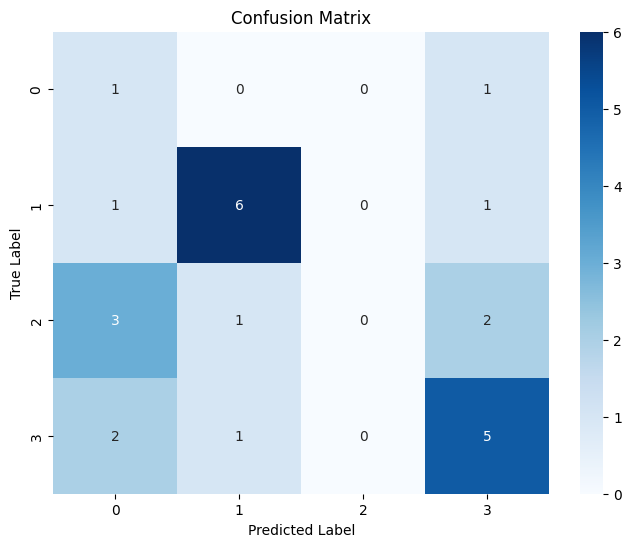

Classification Report:
              precision    recall  f1-score   support

           1       0.14      0.50      0.22         2
           2       0.75      0.75      0.75         8
           3       0.00      0.00      0.00         6
           4       0.56      0.62      0.59         8

    accuracy                           0.50        24
   macro avg       0.36      0.47      0.39        24
weighted avg       0.45      0.50      0.46        24



In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report (includes precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
